# AdaBoost (Use decision trees to implement the ensemble method)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
train = pd.read_csv('hw5-boosting/data/banana_train.csv',header=None,names=['label','feature_1','feature_2'])
test = pd.read_csv('hw5-boosting/data/banana_test.csv',header=None,names=['label','feature_1','feature_2'])

In [3]:
# training set
x_train = train[['feature_1', 'feature_2']]
y_train = train['label']
# test set
x_test = test[['feature_1', 'feature_2']]
y_test = test['label']

In [4]:
class Adaboost():
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def train(self, n_rounds):
        self.n_rounds = n_rounds
        N = len(self.y_train)
        # initiate the weight w
        w = np.ones(N)/N
        self.weak_classifiers = []
        self.alphas = []
        for i in range(self.n_rounds):
            clf = DecisionTreeClassifier(max_depth=3)
            clf.fit(self.x_train, self.y_train, sample_weight=w)
            self.weak_classifiers.append(clf)
            # get the error
            pred = clf.predict(x_train)
            misclassified = np.where(np.asarray(y_train) != pred)
            error_signal = np.zeros(N)
            error_signal[misclassified[0]] = 1
            error = np.inner(w, error_signal)/sum(w)
            # get alpha
            alpha = np.log((1-error)/error)
            self.alphas.append(alpha)
            # update the weight
            w[misclassified[0]] = w[misclassified[0]] * (1-error) / error
            w = w/w.sum()
            
    def predict(self, x_test):
        pred = np.zeros(len(x_test))
        for i in range(len(self.weak_classifiers)):
            pred += self.alphas[i] * self.weak_classifiers[i].predict(x_test)
        self.pred = np.sign(pred)
        return self.pred
    
    def score(self, y_test):
        # get the accuracy rate
        n_test = len(y_test)
        errors = len(np.where(y_test.values != self.pred)[0])
        return (n_test - errors)/float(n_test)


In [5]:
adb = Adaboost(x_train, y_train)
test_errors = []
train_errors = []

for n_rounds in range(1,51):
    adb.train(n_rounds)
    adb.predict(x_train)
    train_errors.append(1-adb.score(y_train))
    adb.predict(x_test)
    test_errors.append(1-adb.score(y_test))
    

In [6]:
print train_errors

[0.1874285714285714, 0.1874285714285714, 0.16200000000000003, 0.14714285714285713, 0.12542857142857144, 0.13542857142857145, 0.11399999999999999, 0.10828571428571432, 0.10742857142857143, 0.10542857142857143, 0.10628571428571432, 0.10542857142857143, 0.10628571428571432, 0.10542857142857143, 0.10542857142857143, 0.10685714285714287, 0.09828571428571431, 0.10085714285714287, 0.09457142857142853, 0.09371428571428575, 0.0882857142857143, 0.08599999999999997, 0.0882857142857143, 0.0862857142857143, 0.08885714285714286, 0.08199999999999996, 0.0862857142857143, 0.0814285714285714, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08285714285714285, 0.08514285714285719

In [7]:
print test_errors

[0.1955555555555556, 0.1955555555555556, 0.18611111111111112, 0.15111111111111108, 0.15333333333333332, 0.14055555555555554, 0.1444444444444445, 0.11944444444444446, 0.12722222222222224, 0.12777777777777777, 0.12555555555555553, 0.12777777777777777, 0.12555555555555553, 0.12777777777777777, 0.12777777777777777, 0.13055555555555554, 0.11888888888888893, 0.12222222222222223, 0.12444444444444447, 0.11888888888888893, 0.12222222222222223, 0.1233333333333333, 0.1216666666666667, 0.11722222222222223, 0.10944444444444446, 0.11611111111111116, 0.10777777777777775, 0.11111111111111116, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.11166666666666669, 0.10944444444444446, 0.113333333333333

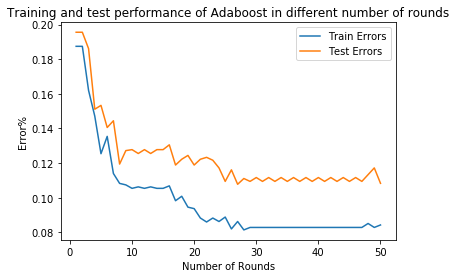

In [9]:
plt.plot(range(1,51), train_errors)
plt.plot(range(1,51), test_errors)
plt.legend(['Train Errors','Test Errors'])
plt.xlabel('Number of Rounds')
plt.ylabel('Error%')
plt.title('Training and test performance of Adaboost in different number of rounds')
plt.show()